# Framingham Heart Disease Risk Study
 ## Data Wrangling

## Imports

In [1]:
# Import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import math
from scipy.stats.mstats import winsorize

In [2]:
# Importing the functions python files
import importlib
from functions.sb_utils import save_file
from functions.grid_plots import plot_grid_bar, plot_grid_displots, plot_grid_violin, plot_box_grid


## Load the Framingham Heart Study Data
The project will be using the Framingham Heart Study Dataset

In [3]:
# Load csv data file
df = pd.read_csv('../data/raw/Framingham Heart Study.csv')

## Dataset overview

In [4]:
# Dataset head overview
df.head()

id  age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   0   64        2.0   F        YES         3.0     0.0                0   
1   1   36        4.0   M         NO         0.0     0.0                0   
2   2   46        1.0   F        YES        10.0     0.0                0   
3   3   50        1.0   M        YES        20.0     0.0                0   
4   4   64        1.0   F        YES        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0    NaN       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

## Table shape

In [5]:
# Getting the shape of the table
print(f'Shape:\t\t{df.shape}\n'
      f'Rows:\t\t{df.shape[0]}\n'
      f'Columns: \t{df.shape[1]}')

Shape:		(3390, 17)
Rows:		3390
Columns: 	17


# Dataset features and info

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

## Duplicate values

In [7]:
print(f' Number of duplicate values:\t{df.duplicated().sum()}')

 Number of duplicate values:	0


## Missing values

In [8]:
print(f'There are 7 columns with missing values.\n'
      f'Total number of missing values:\t{df.isna().sum().sum()}')
df.isna().sum().sort_values(ascending=False).head(10)

There are 7 columns with missing values.
Total number of missing values:	510


glucose       304
education      87
BPMeds         44
totChol        38
cigsPerDay     22
BMI            14
heartRate       1
id              0
diaBP           0
sysBP           0
dtype: int64

<AxesSubplot: >

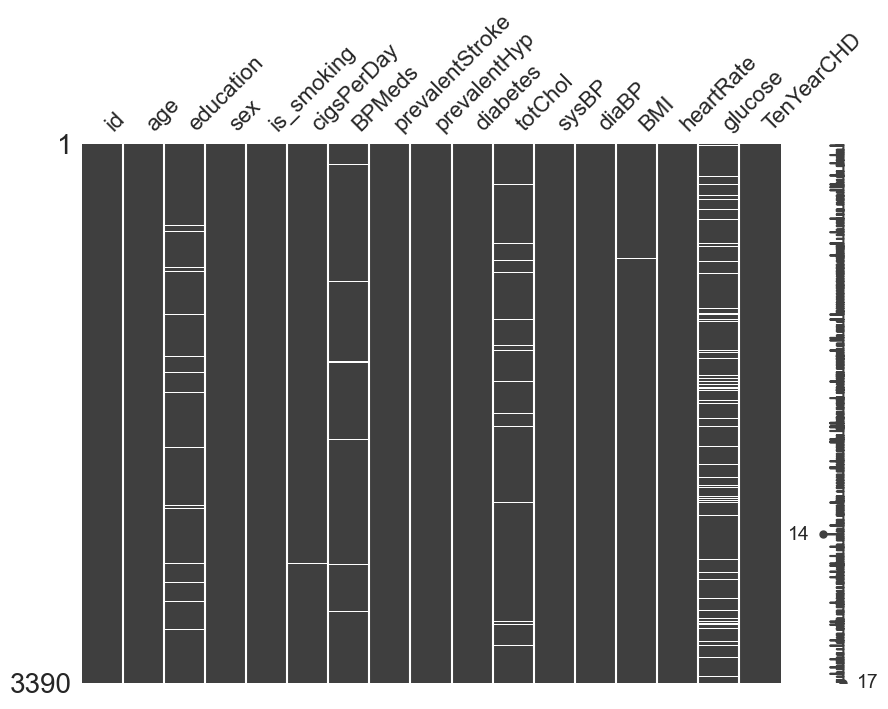

In [9]:
# Visualize missing values
msno.matrix(df, figsize=(10,7))

<AxesSubplot: >

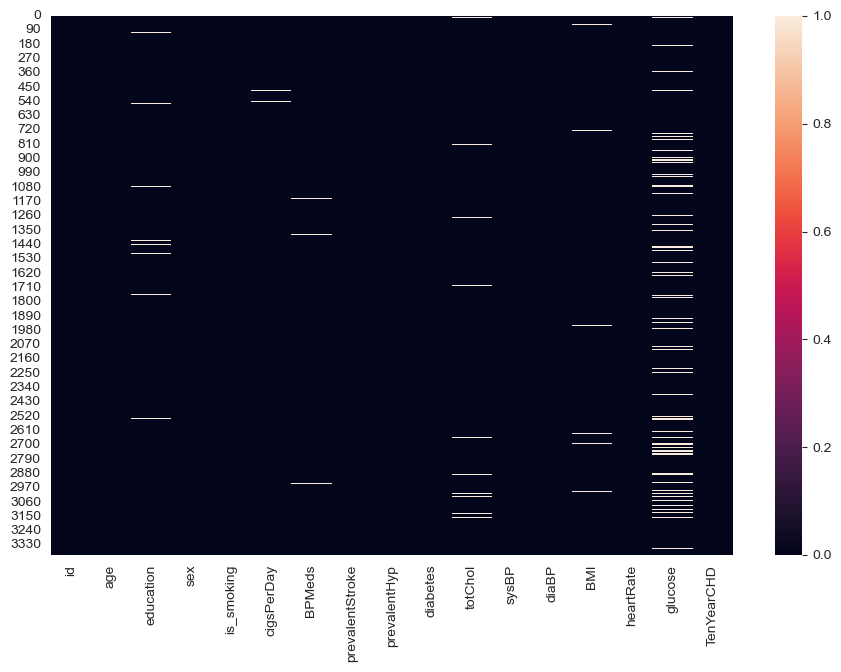

In [10]:
# Another way of visualizing missing values
plt.figure(figsize=(11,7))
sns.heatmap(df.isna())

## Dataset summary of observations
- Number of rows:                     3390
- Number of columns:                  17
- Value to be predicted by the model: TenYearCHD
- Number of duplicated values:        0
- Number of missing values:           510
- Top missing feature:                glucose (304 missing)
- `sex` and `is_smoking` columns are not numerical data type, might need to convert them later. 


## Overview of the features

In [11]:
# Viewing all column names
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

Let's describe what each feature means.
* id: (unique)
    * id of a patient 
* age: (continuous)
    * Age of the patient 
* education: (ordinal)
    1. Some high school
    2. High school diploma
    3. Some college or vocational training
    4. College degree or higher
* sex: (nominal)
    * F for female
    * M for male
* is_smoking: (nominal)
    * Yes
    * No 
* cigsPerDay: (continuous)
    * Number of cigarettes smoked each day
* BPMeds: (nominal)
    * 1 if patient takes anti-hypertension medications
    * 0 if patient does not take anti-hypertension medications
* prevalentStroke: (nominal)
    * 1 if patient previously had stroke
    * 0 if patient did not have stroke in the past
* prevalentHyp: (nominal)
    * 1 if patient previously had diagnosed hypertension
    * 0 if patient did not have hypertension in the past
* diabetes: (nominal)
    * 1 if patient has diabetes
    * 0 if patient does not have diabetes
* totChol: (continuous)
    * Total cholesterol concentration (mg/dl)
* sysBP: (continuous)
    * Systolic blood pressure (mmHg)
* diaBP: (continuous)
    * Diastolic blood pressure (mmHg)
* BMI: (continuous)
    * Body Mass Index
* heartRate: (continuous)
    * Heart Rate (bpm)
* glucose: (continuous)
    * Blood glucose concentration (mg/dl)
* TenYearCHD: (nominal) ----> Target
    * 1 if patient has 10 year risk of coronary heart disease (CHD)
    * 0 if patient has no 10 year CHD risk

In [12]:
# Describe df
df.describe()

id          age    education   cigsPerDay       BPMeds  \
count  3390.000000  3390.000000  3303.000000  3368.000000  3346.000000   
mean   1694.500000    49.542183     1.970936     9.069477     0.029886   
std     978.753033     8.592878     1.019081    11.879078     0.170299   
min       0.000000    32.000000     1.000000     0.000000     0.000000   
25%     847.250000    42.000000     1.000000     0.000000     0.000000   
50%    1694.500000    49.000000     2.000000     0.000000     0.000000   
75%    2541.750000    56.000000     3.000000    20.000000     0.000000   
max    3389.000000    70.000000     4.000000    70.000000     1.000000   

       prevalentStroke  prevalentHyp     diabetes      totChol       sysBP  \
count      3390.000000   3390.000000  3390.000000  3352.000000  3390.00000   
mean          0.006490      0.315339     0.025664   237.074284   132.60118   
std           0.080309      0.464719     0.158153    45.247430    22.29203   
min           0.000000      0.000000     0.000000   107.000000    83.50000   
25%           0.000000      0.000000     0.000000   206.000000   117.00000   
50%           0.000000      0.000000     0.000000   234.000000   128.50000   
75%           0.000000      1.000000     0.000000   264.000000   144.00000   
max           1.000000      1.000000     1.000000   696.000000   295.00000   

             diaBP          BMI    heartRate      glucose   TenYearCHD  
count  3390.000000  3376.000000  3389.000000  3086.000000  3390.000000  
mean     82.883038    25.794964    75.977279    82.086520     0.150737  
std      12.023581     4.115449    11.971868    24.244753     0.357846  
min      48.000000    15.960000    45.000000    40.000000     0.000000  
25%      74.500000    23.020000    68.000000    71.000000     0.000000  
50%      82.000000    25.380000    75.000000    78.000000     0.000000  
75%      90.000000    28.040000    83.000000    87.000000     0.000000  
max     142.500000    56.800000   143.000000   394.000000     1.000000

## Categorical ans Continuous Values Overview

### Categorical features

In [13]:
# List for categorical values
categorical_cols = ['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']

In [14]:
# Print unique categorical values
for col in categorical_cols:
    print(f'Unique values in {col} column: {df[col].unique()}')

Unique values in education column: [ 2.  4.  1.  3. nan]
Unique values in sex column: ['F' 'M']
Unique values in is_smoking column: ['YES' 'NO']
Unique values in BPMeds column: [ 0. nan  1.]
Unique values in prevalentStroke column: [0 1]
Unique values in prevalentHyp column: [0 1]
Unique values in diabetes column: [0 1]


Summary:
- All features except `education` are binomial:
    - `sex` column shows M for male and F for female
    - all other columns have 1 if the feature is present in patient, and 0 if it's absent
        - `is_smoking` represents it in the verbose form (YES or NO)
- Education column has levels of education from 1 to 4:
    1. Some high school
    2. High school diploma
    3. Some college or vocational training
    4. College degree or higher
- `id` column is basically an index

### Literal to numeric conversion

In [15]:
df['sex'] = (df['sex'] == 'M').astype('int')
df['is_smoking'] = (df['is_smoking'] == 'YES').astype('int')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   int64  
 4   is_smoking       3390 non-null   int64  
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

#### Distribution of categorical features

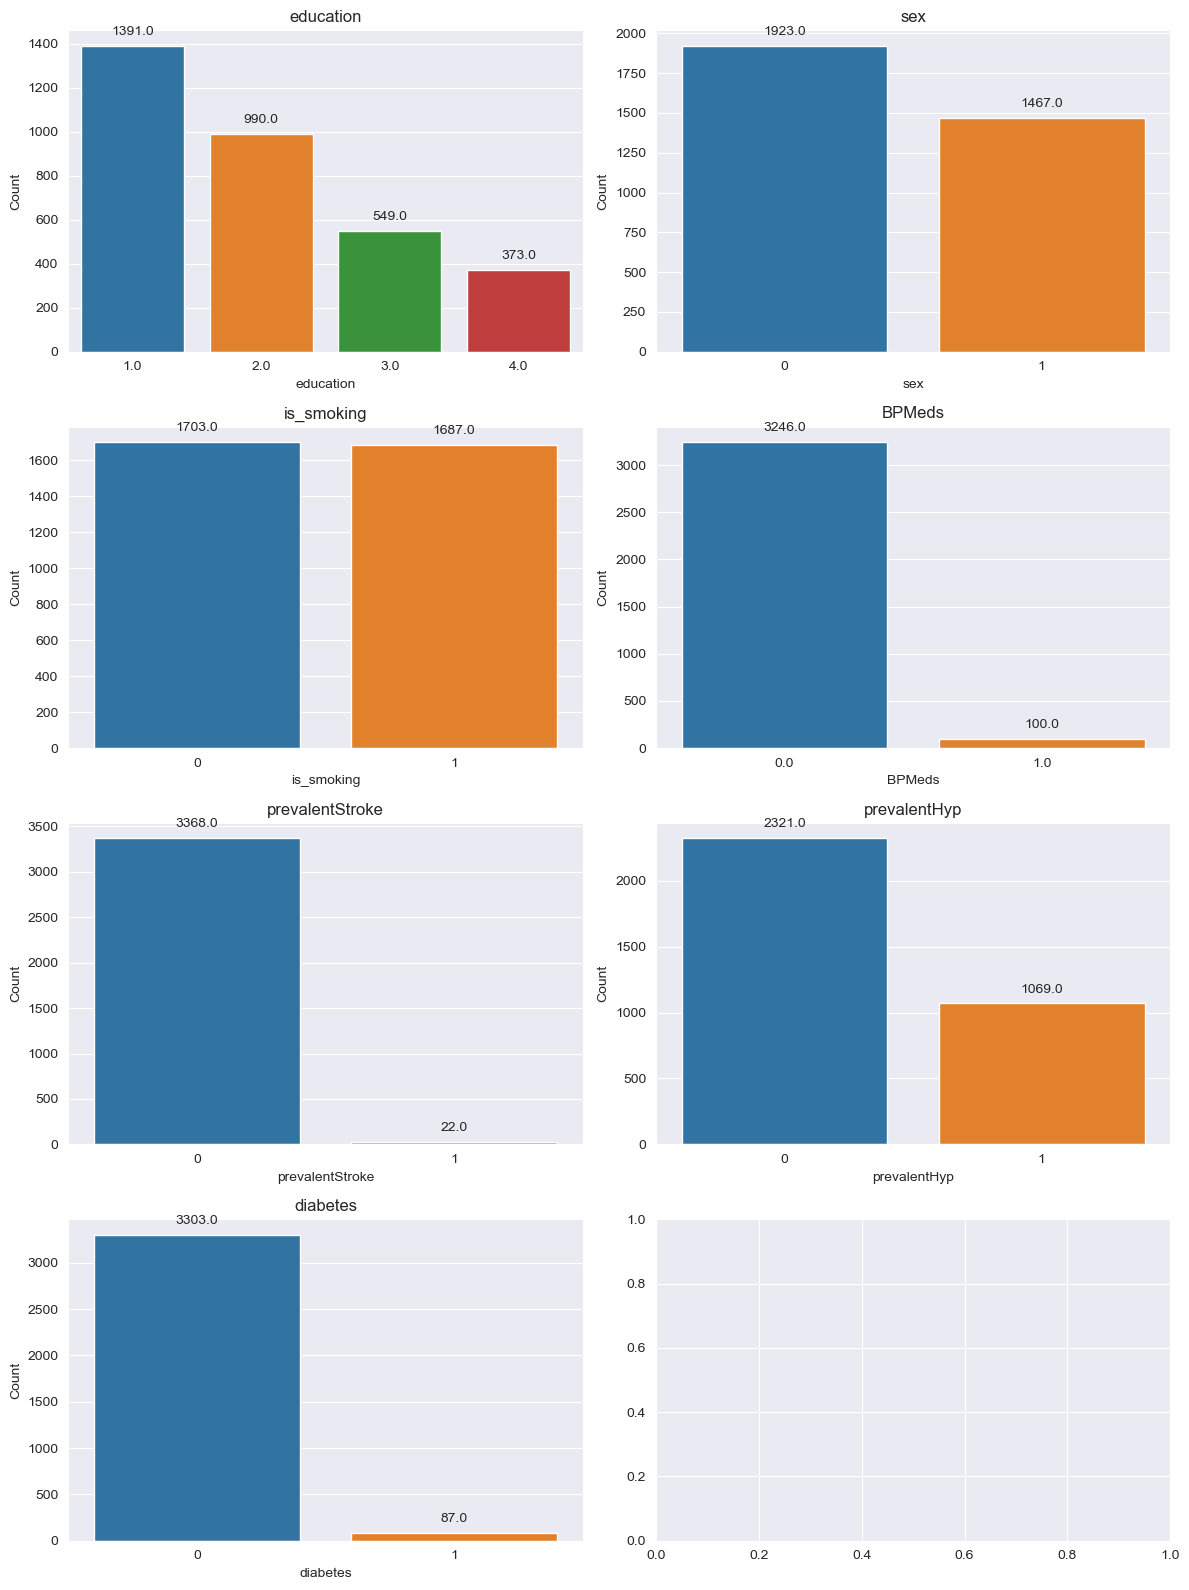

In [17]:
# Plot the distribution of categorical features using imported function
plot_grid_bar(df, categorical_cols)

#### Categorical features summary
- Education level seems to be reasonably representing the general population, where number of more educated people is lower than less educated.
- There are more women than men (Does it depend on the age? See below).
- Smokers and non-smokers are very balanced.
- Only 100 patients take medications for high blood pressure, but there are 1069 patients with the diagnosis of hypertension.
- There is a negligible amount of patients with prevalent stroke (only 22 people).
- There is also few people with established diagnosis of diabetes (87 people).

##### Does ratio of men/women change with age?

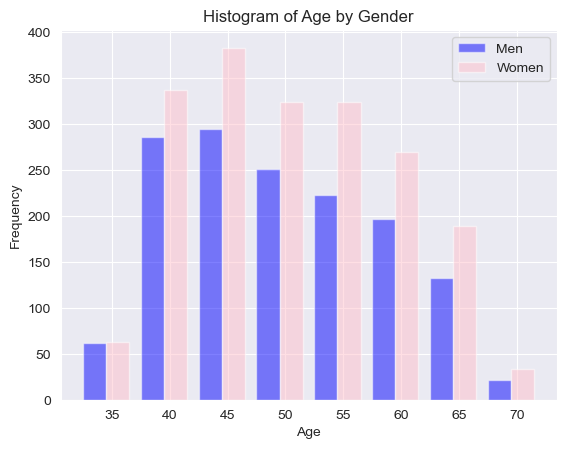

In [18]:
# # Separate data for men and women
men_data = df[df['sex'] == 1]['age']
women_data = df[df['sex'] == 0]['age']

# Set the bin width
bin_width = 5

# Plot the histogram
plt.hist([men_data, women_data], bins=range(min(df['age']), max(df['age']) + bin_width, bin_width), alpha=0.5, color=['blue', 'pink'], label=['Men', 'Women'])

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age by Gender')
plt.legend()

# Show the plot
plt.show()

It seems like women are prevalent in all age groups.

### Continuous features

In [19]:
# List of continuous features
continuous_cols = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

# Describe continuous features
df[continuous_cols].describe()

age   cigsPerDay      totChol       sysBP        diaBP  \
count  3390.000000  3368.000000  3352.000000  3390.00000  3390.000000   
mean     49.542183     9.069477   237.074284   132.60118    82.883038   
std       8.592878    11.879078    45.247430    22.29203    12.023581   
min      32.000000     0.000000   107.000000    83.50000    48.000000   
25%      42.000000     0.000000   206.000000   117.00000    74.500000   
50%      49.000000     0.000000   234.000000   128.50000    82.000000   
75%      56.000000    20.000000   264.000000   144.00000    90.000000   
max      70.000000    70.000000   696.000000   295.00000   142.500000   

               BMI    heartRate      glucose  
count  3376.000000  3389.000000  3086.000000  
mean     25.794964    75.977279    82.086520  
std       4.115449    11.971868    24.244753  
min      15.960000    45.000000    40.000000  
25%      23.020000    68.000000    71.000000  
50%      25.380000    75.000000    78.000000  
75%      28.040000    83.000000    87.000000  
max      56.800000   143.000000   394.000000

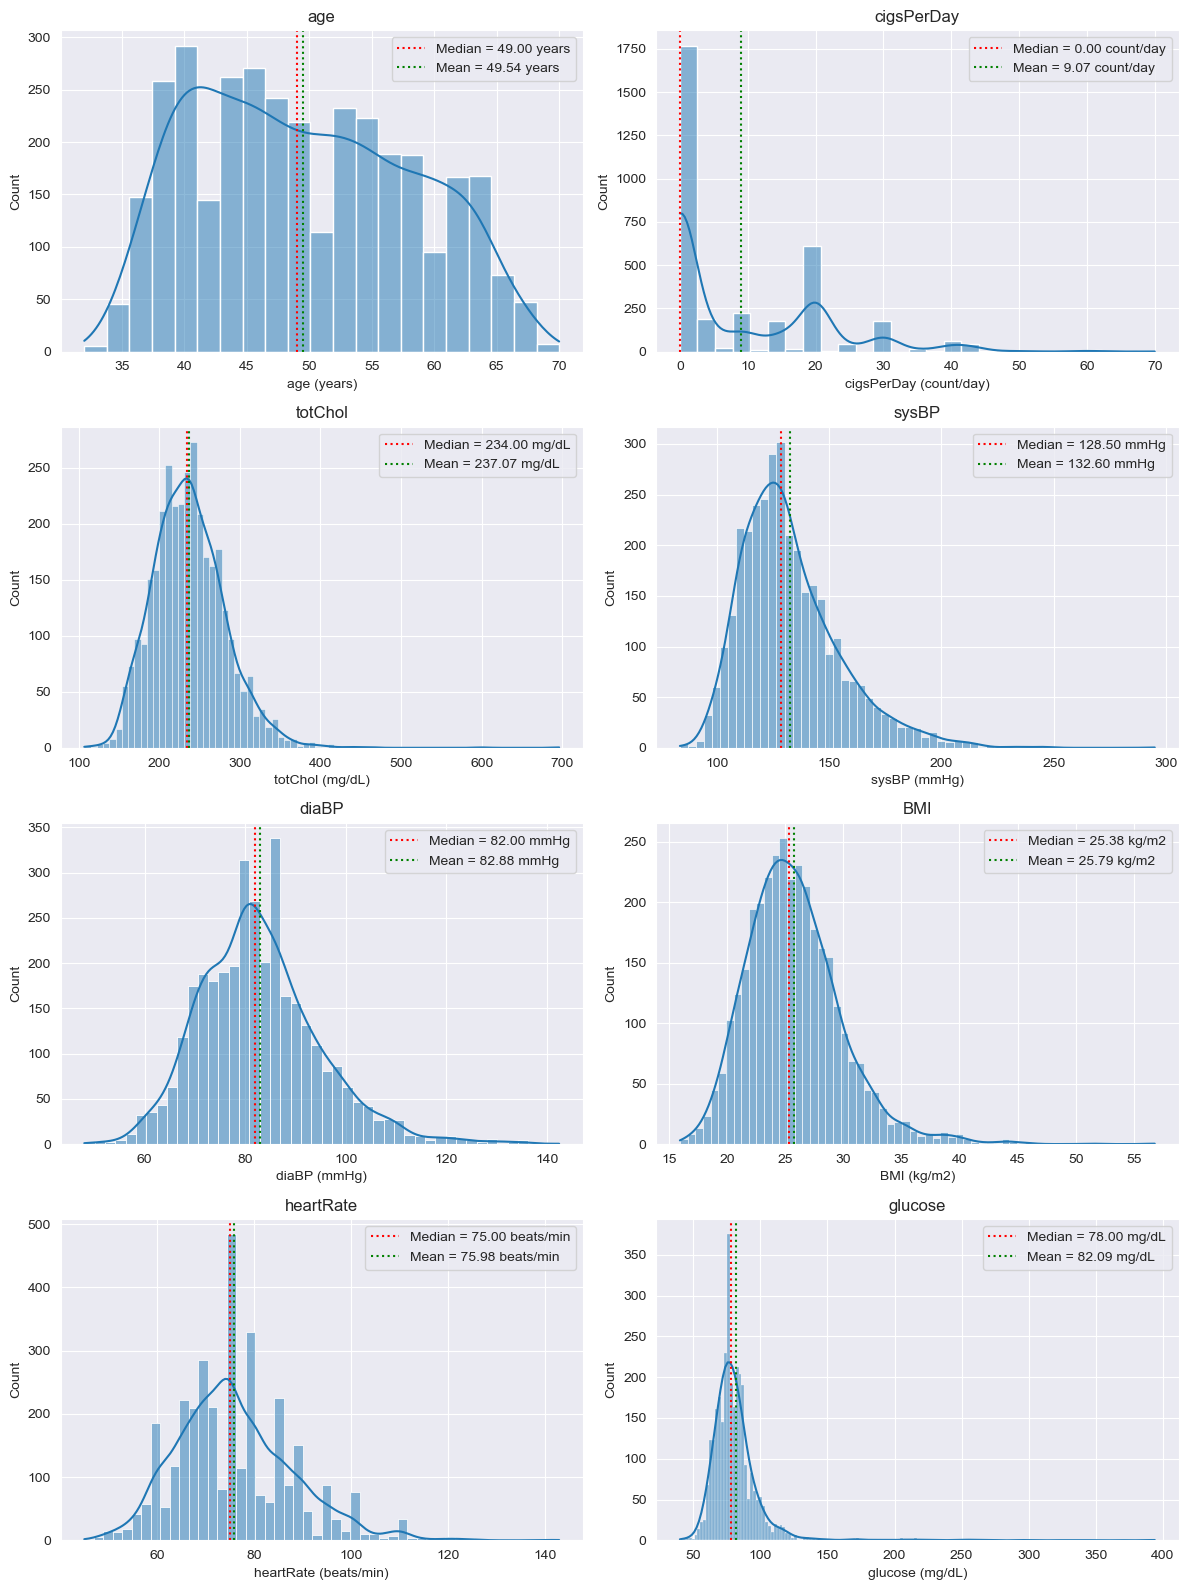

In [20]:
# List of units for these continuous variables
unit_list = ['years', 'count/day', 'mg/dL', 'mmHg', 'mmHg', 'kg/m2', 'beats/min', 'mg/dL']

# Calling a function from the functions library that will plot distributions in a grid
plot_grid_displots(df, continuous_cols, unit_list)

Most of the distributions are skewed.  Most likely due to outliers, patients with extremely high values of certain features, that we need to address.
For example, values like total cholesterol concentration, glucose concentration, or blood pressure have extremely high values for some of the patients that may indicate severe medical conditions and emergencies.
There are very few patients who take anti-hypertension medications, while mean of the systolic blood pressure among all observed patients is 132 mmHg, which is higher than reference values for normal blood pressure. We may be dealing with "poorly medically managed" population, which may need to be reflected in the final report.
But these values are NOT unrealistic. Our strategy for dealing with these outliers will be discussed later.

Trying to even the distribution of blood pressure by introducing Mean Arterial BP (MAP). Using formula MAP = Diastolic + 1/3(Systolic - Diastolic)

In [21]:
# Function to calculate MAP
def calc_map(data):
    data['MAP'] = data['diaBP'] + 1 / 3  * (data['sysBP'] - data['diaBP'])
    data['MAP'] = data['MAP'].apply(lambda x: round(x, 2))

In [22]:
# Create a column for MAP
calc_map(df)

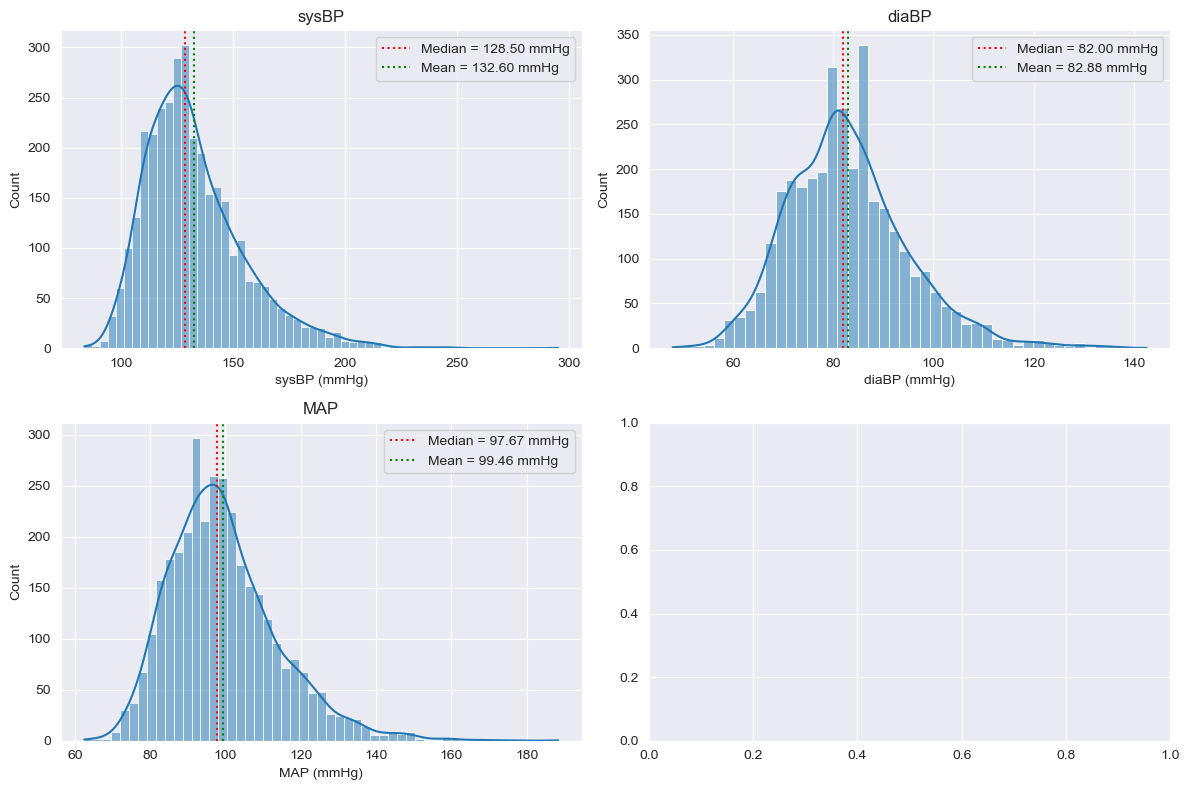

In [23]:
# Visualise distribution of pressure columns
pressure_cols = ['sysBP', 'diaBP', 'MAP']
units = ['mmHg', 'mmHg', 'mmHg']
plot_grid_displots(df, pressure_cols, units)

The distribution looks almost the same, but it may help with dimensionality reduction. Based on MAP we can define if the patient has hypertension or not (MAP > 105). Let's compare our calculated hypertension with what was provided by dataset.

In [24]:
# Function to create hypertension_calc based on map
def classify_htn_map(data):
    data['hypertension_calc'] = 0
    data.loc[data['MAP']>105, 'hypertension_calc'] = 1
    print(f'Hypertension from original data: {data["prevalentHyp"].value_counts()[0]}\n'
          f'Hypertension calculated in new set: {data["hypertension_calc"].value_counts()[0]}')

In [25]:
# Calling function to create hypertension_calc class
classify_htn_map(df)

Hypertension from original data: 2321
Hypertension calculated in new set: 2404


There is not much of a difference. Later we might drop 'prevalentHyp' column along with the 'sysBP' and 'diaBP', and use 'MAP' and 'hypertension_calc' instead.

### Distribution of the 10-Year Risk of CHD

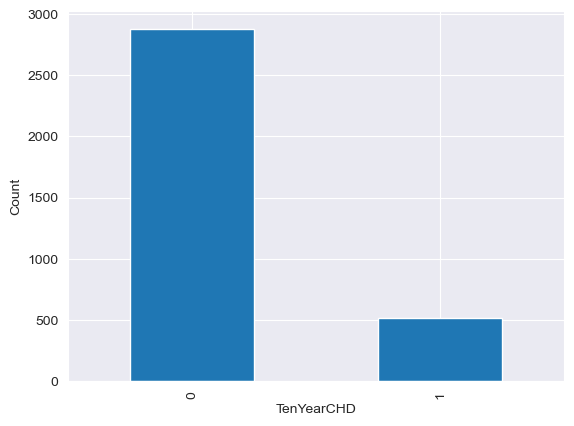

In [26]:
# Plotting 10-year risk
ax = df['TenYearCHD'].value_counts().plot(kind='bar')
plt.ylabel('Count')
plt.xlabel('TenYearCHD');

#### Summary
There is a high imbalance between the classes in the feature we aim to predict with almost 6x more patients without 10-year risk of CHD. We will have to address this issue. 

### Relationship between 10-year risk and other variables

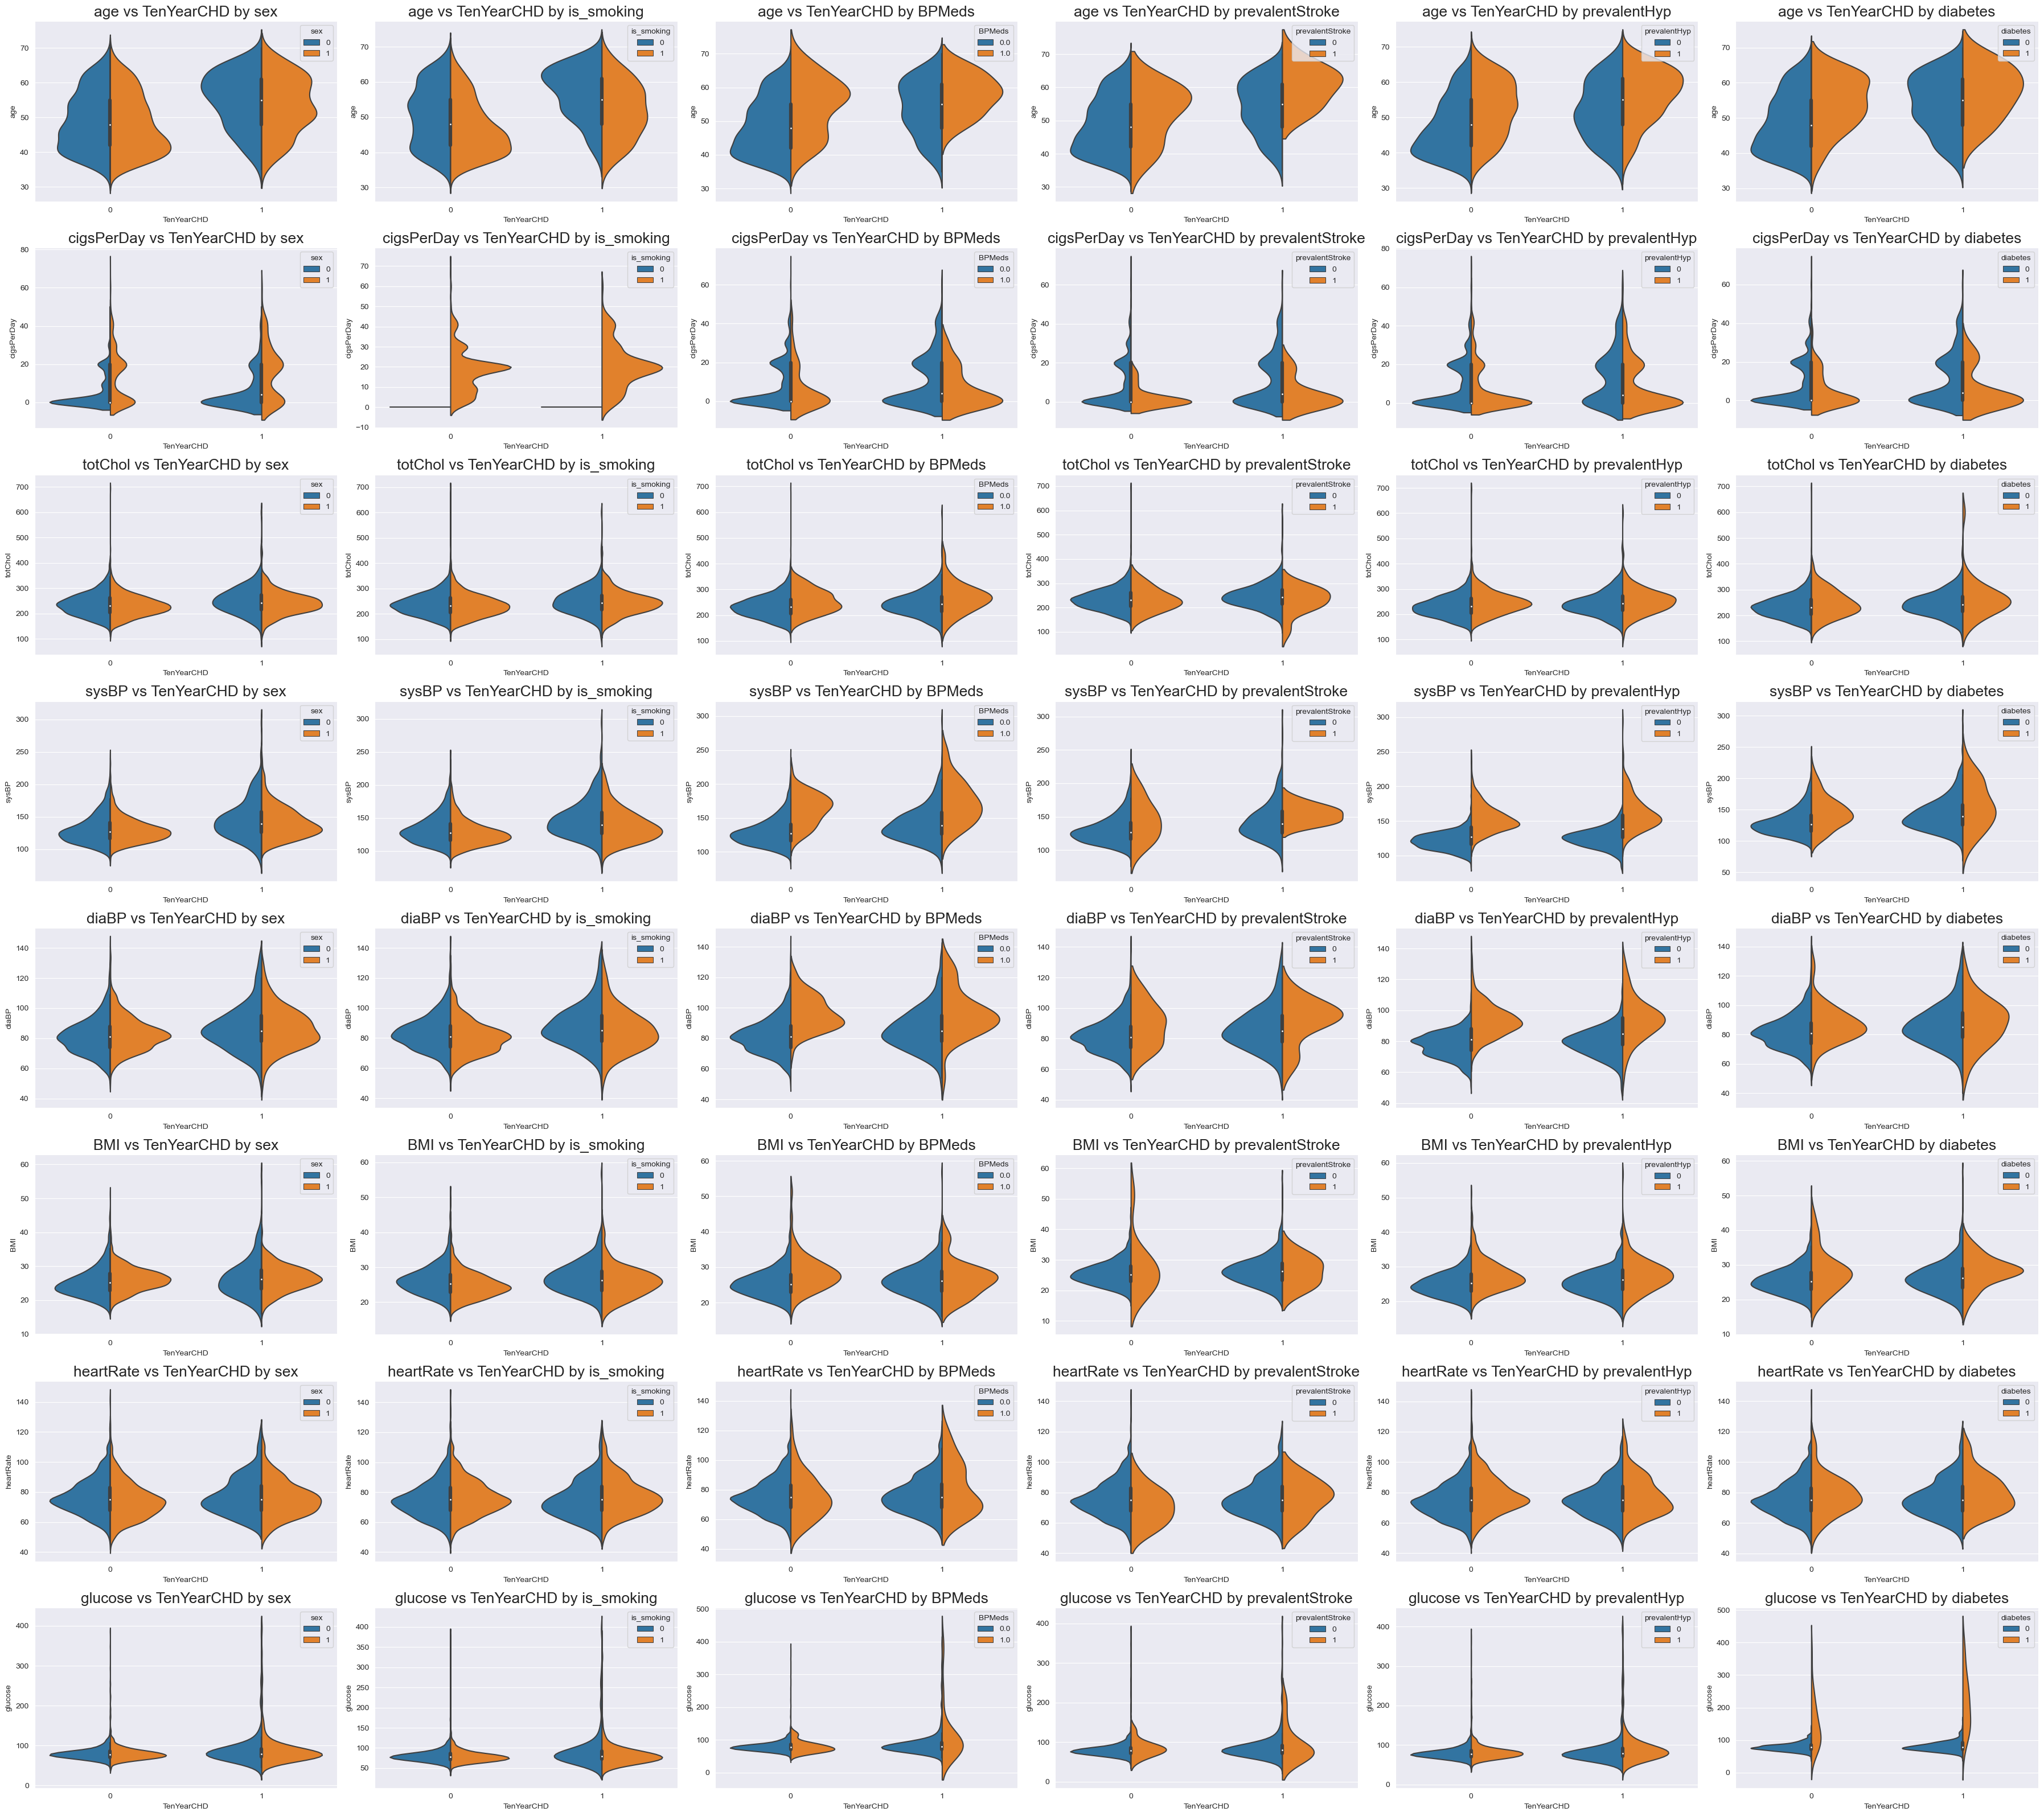

In [27]:
# List of binomial variables
binomial_cols = ['sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']

# Plotting a grid of violin plots
plot_grid_violin(data=df, binom='TenYearCHD', continuous_vars=continuous_cols, binom_vars=binomial_cols)

#### Summary
- One of the major features influencing the 10-year risk of CHD is patient's age. 
    - Interestingly, diabetes and hypertension make this less pronounced. 
- Smoking also contributes to 10-year CHD. Number of cigarettes per day may also contribute to the increased risk.
- Blood pressure may also be contributing factor. Although, there is a certain hypo-diagnosis of diabetes in this population. So we might need to categorize glucose values into the stages of hyperglycemia.

Side notes:
Many features have interesting but expected behaviors, shifting distributions if they are present:
- Blood pressures tend to be higher in patients that are taking BP medications. Also, patients with higher BP tend to be already taking BP meds. 
- Diabetes flattens some distributions (except BMI, which is interesting, because higher BMI values tend to contribute to diabetes in patients)

Let's see how these variables' proportions based on TenYearCHD 


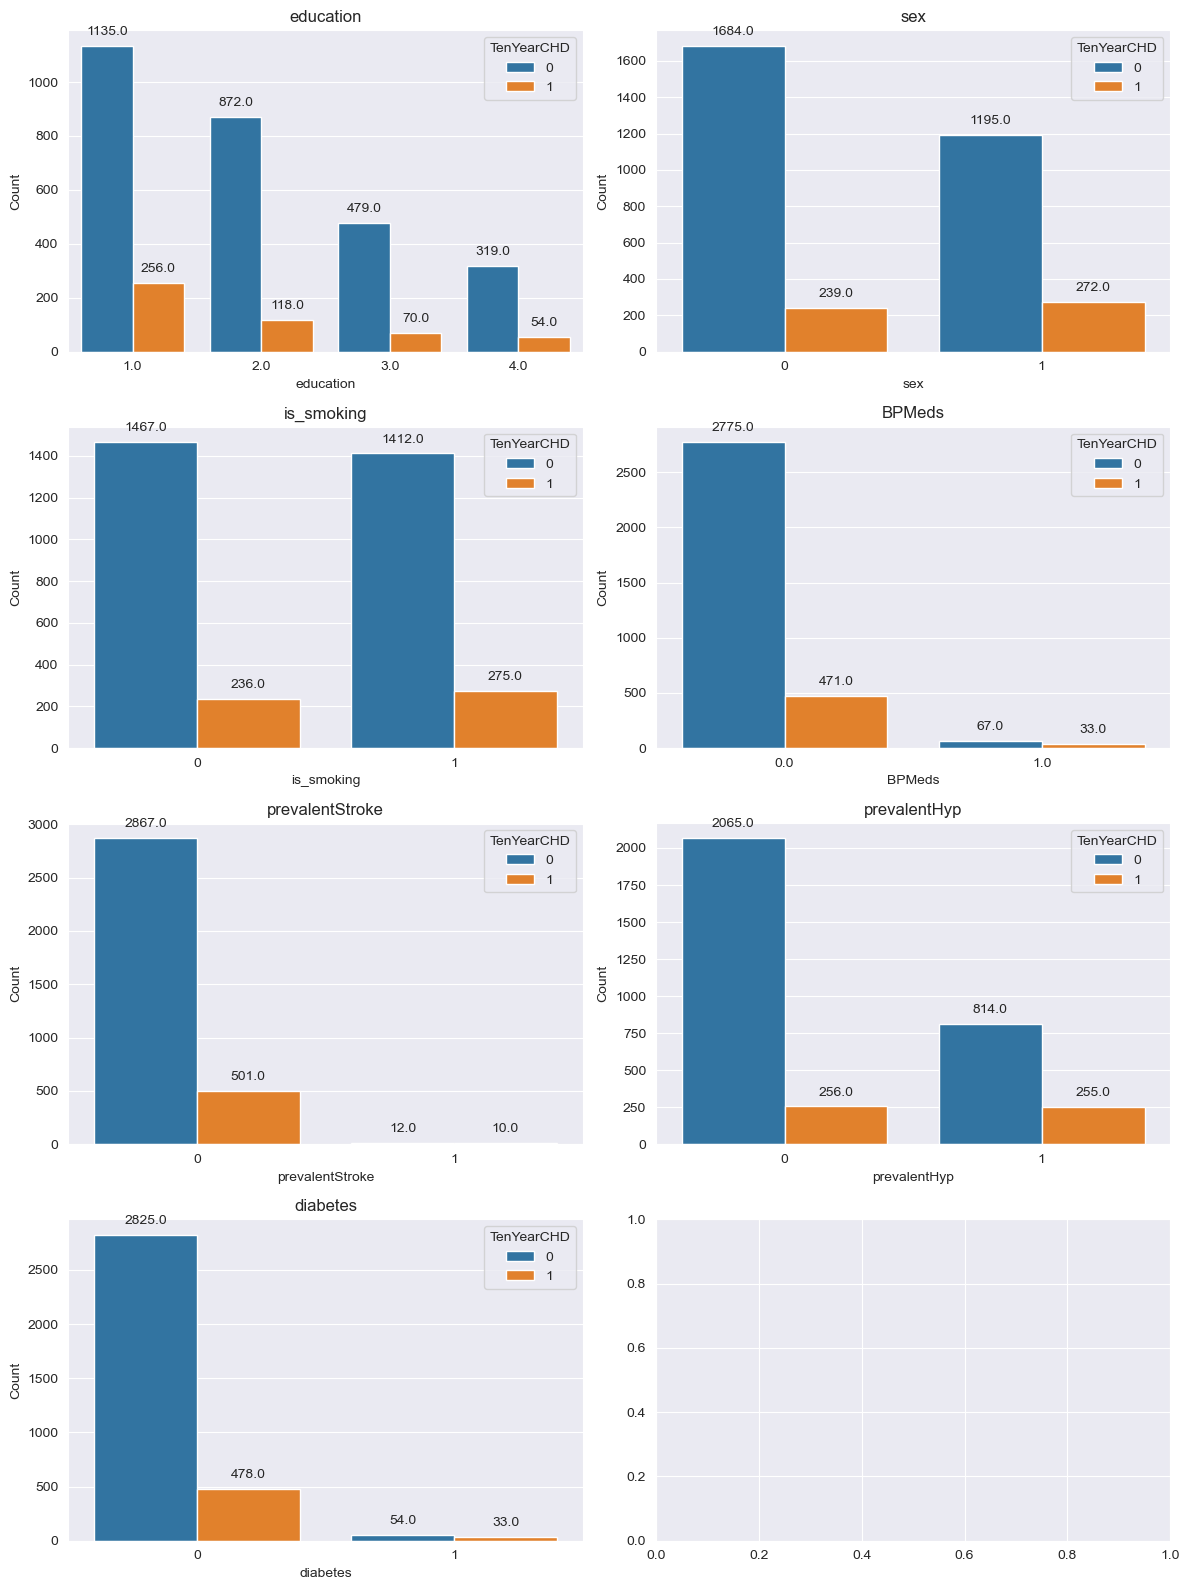

In [28]:
# Call the function to draw barplots with separate bars for TenYearCHD
plot_grid_bar(df, categorical_cols, "TenYearCHD")

#### Summary:
- Education does not seem to affect the risk, as it does not change the proportions
- There are more men with higher risk of CHD than women
- Smoking may not be a contributor to 10 year CHD
- There is almost 50% of patient who take BP medications with risk of CHD (but that may be due to under-treatment of population)
- Out of patient with stroke in the past almost everyone has risk of CHD, but there are too few observations within this category
- There is a significant increase in risk in patients with prevalent hypertension, but there is an imbalance in this category 
- Majority of patients with the Dx of diabetes have risk of CHD, but again there are very few observations in this category 

## Handling missing data
Check if values are missing by random.

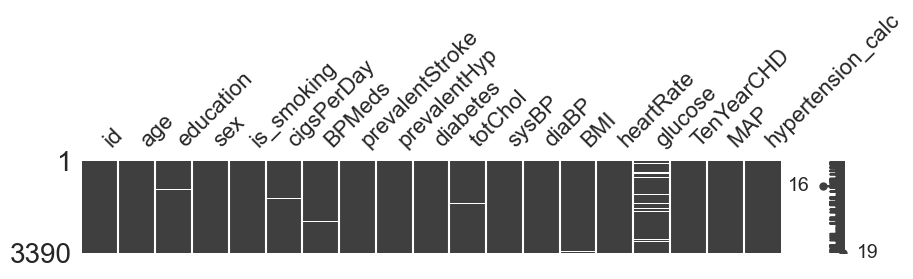

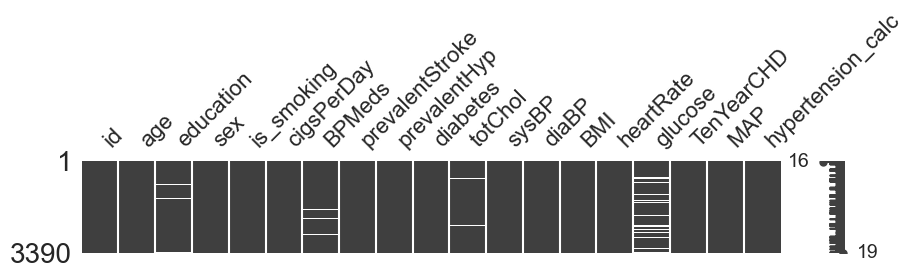

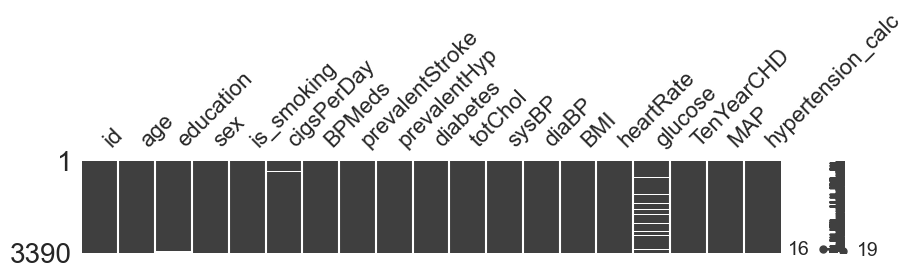

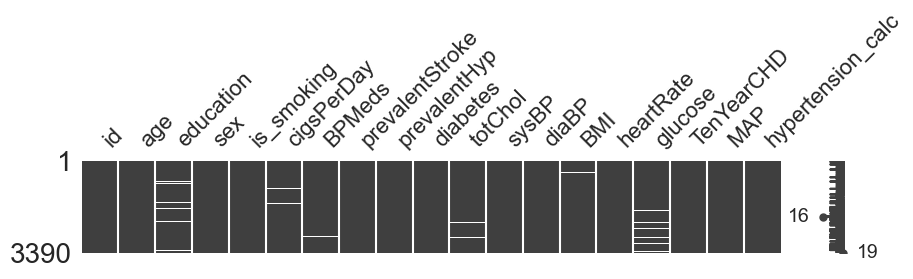

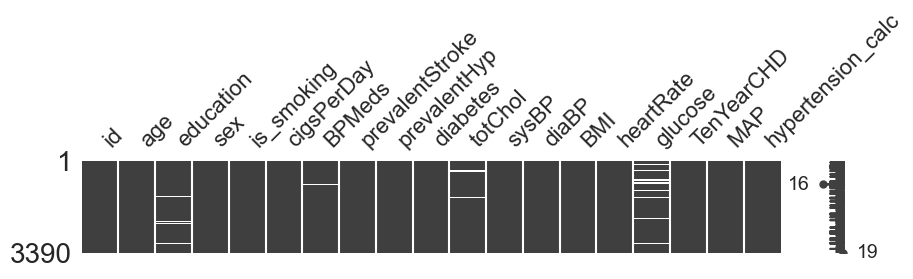

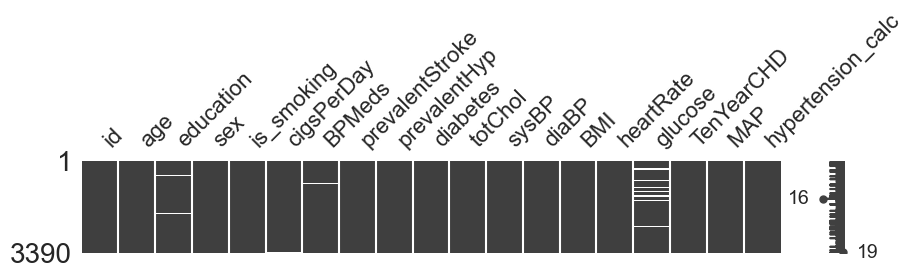

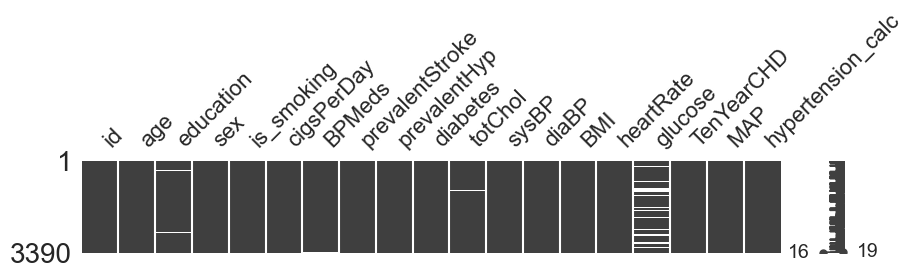

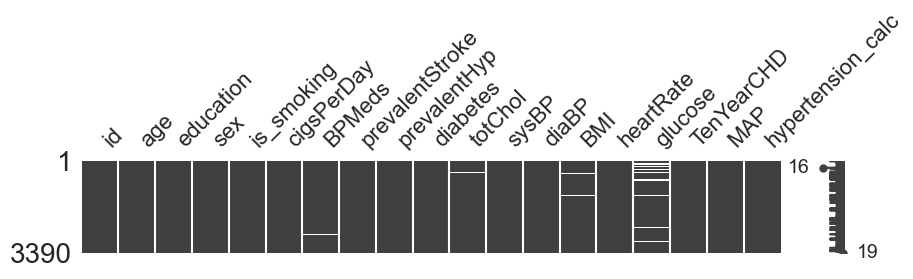

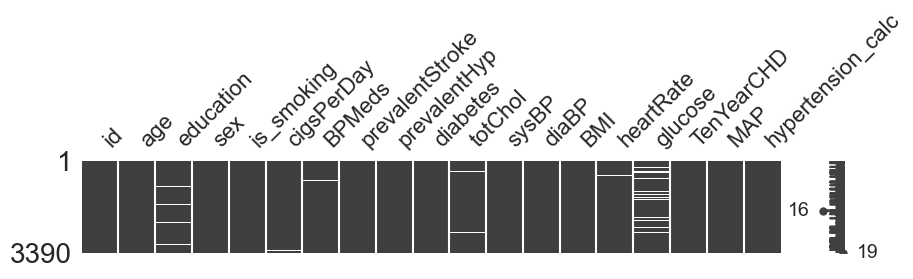

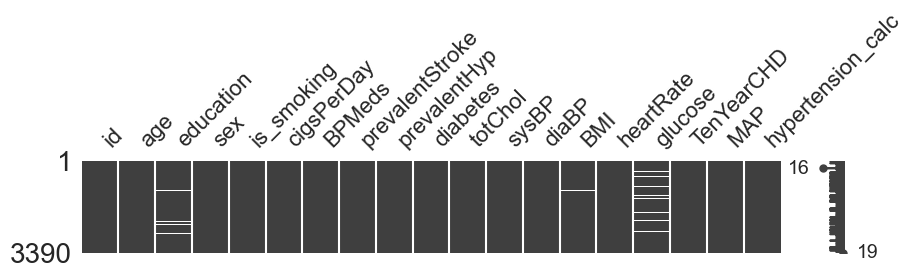

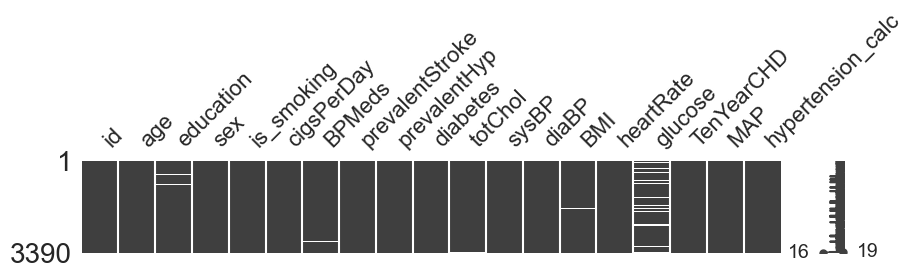

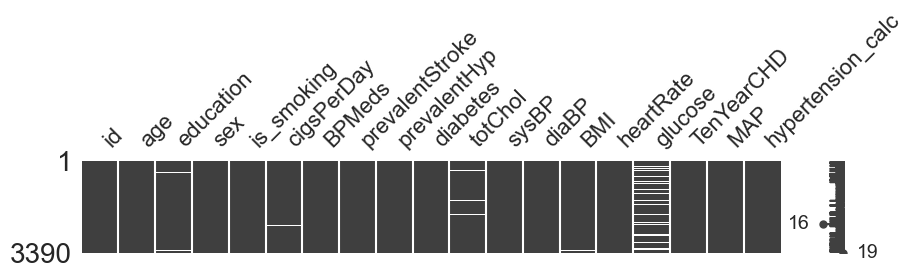

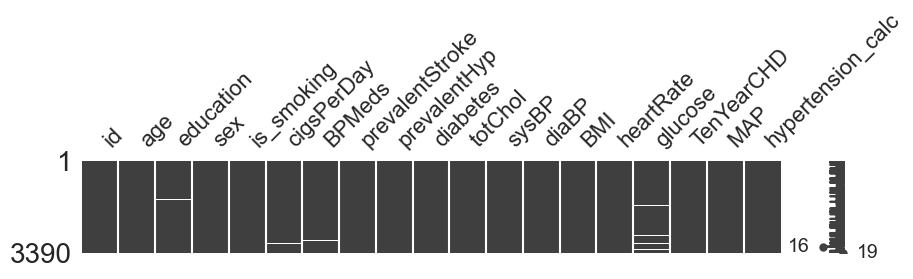

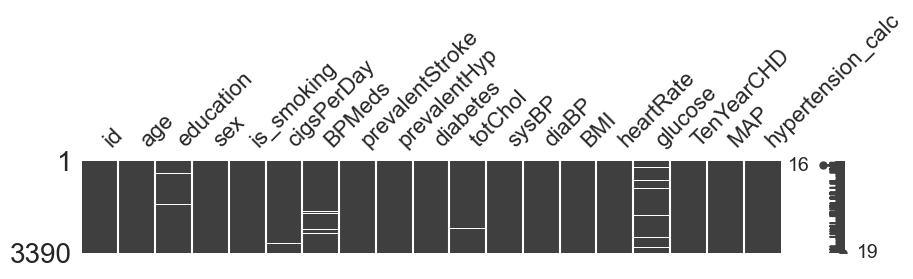

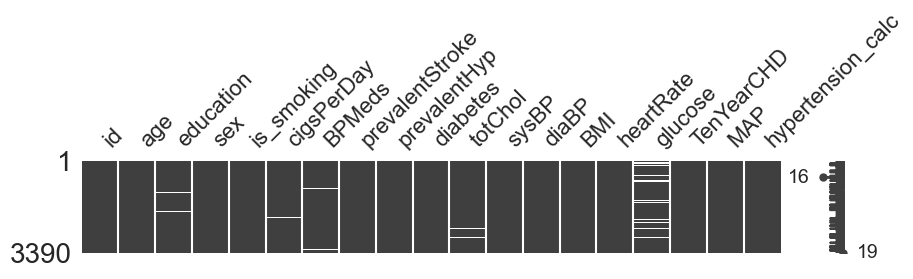

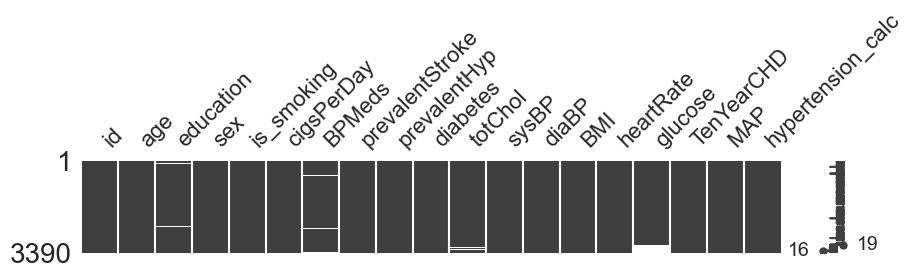

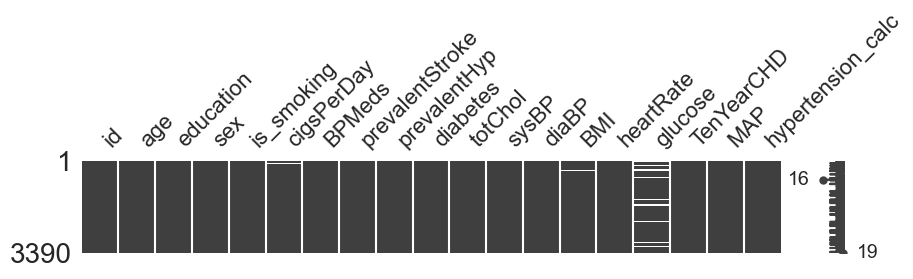

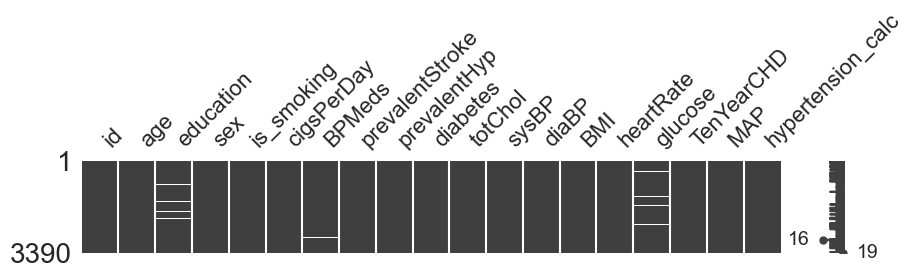

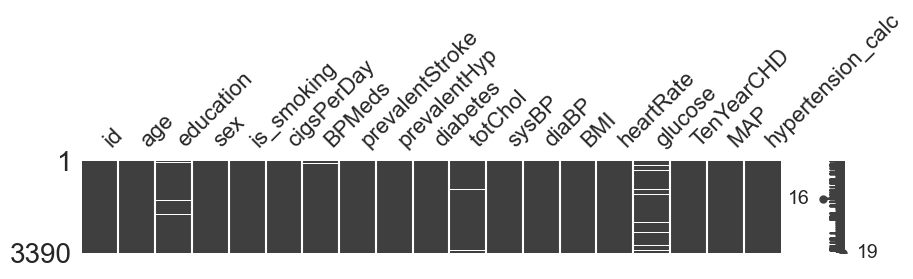

In [29]:
for column in df.columns:
    msno.matrix(df.sort_values(column, ascending=False), figsize=(10,1.2))

There is no pattern in missing values, so they are missing at random. Should be safe to drop some.

In [30]:
print(f"Number of missing glucose: {df['glucose'].isna().sum().sum()}\n"
      f"Percentage of missing glucose: {((df['glucose'].isna().sum().sum() / df.value_counts().sum()) * 100).round(2)}%")

Number of missing glucose: 304
Percentage of missing glucose: 10.39%


Glucose has too many missing values (10.39%), so we will have to impute them. Also, it may be beneficial to introduce degrees of hyperglycemia by level of glucose. This will be done later.

In [31]:
# Number of missing values OTHER THAN glucose

print(f"Number of missing other than glucose: {df.drop('glucose', axis=1).isna().sum().sort_values(ascending=False).sum()}\n"
      f"Percentage of missing other than glucose: {((df.drop('glucose', axis=1).isna().sum().sort_values(ascending=False).sum() / df.value_counts().sum()) * 100).round(2)}%")
df.drop('glucose', axis=1).isna().sum().sort_values(ascending=False).head(7)

Number of missing other than glucose: 206
Percentage of missing other than glucose: 7.04%


education     87
BPMeds        44
totChol       38
cigsPerDay    22
BMI           14
heartRate      1
id             0
dtype: int64

There is 7% of missing values other than glucose. Should be safe to drop them.

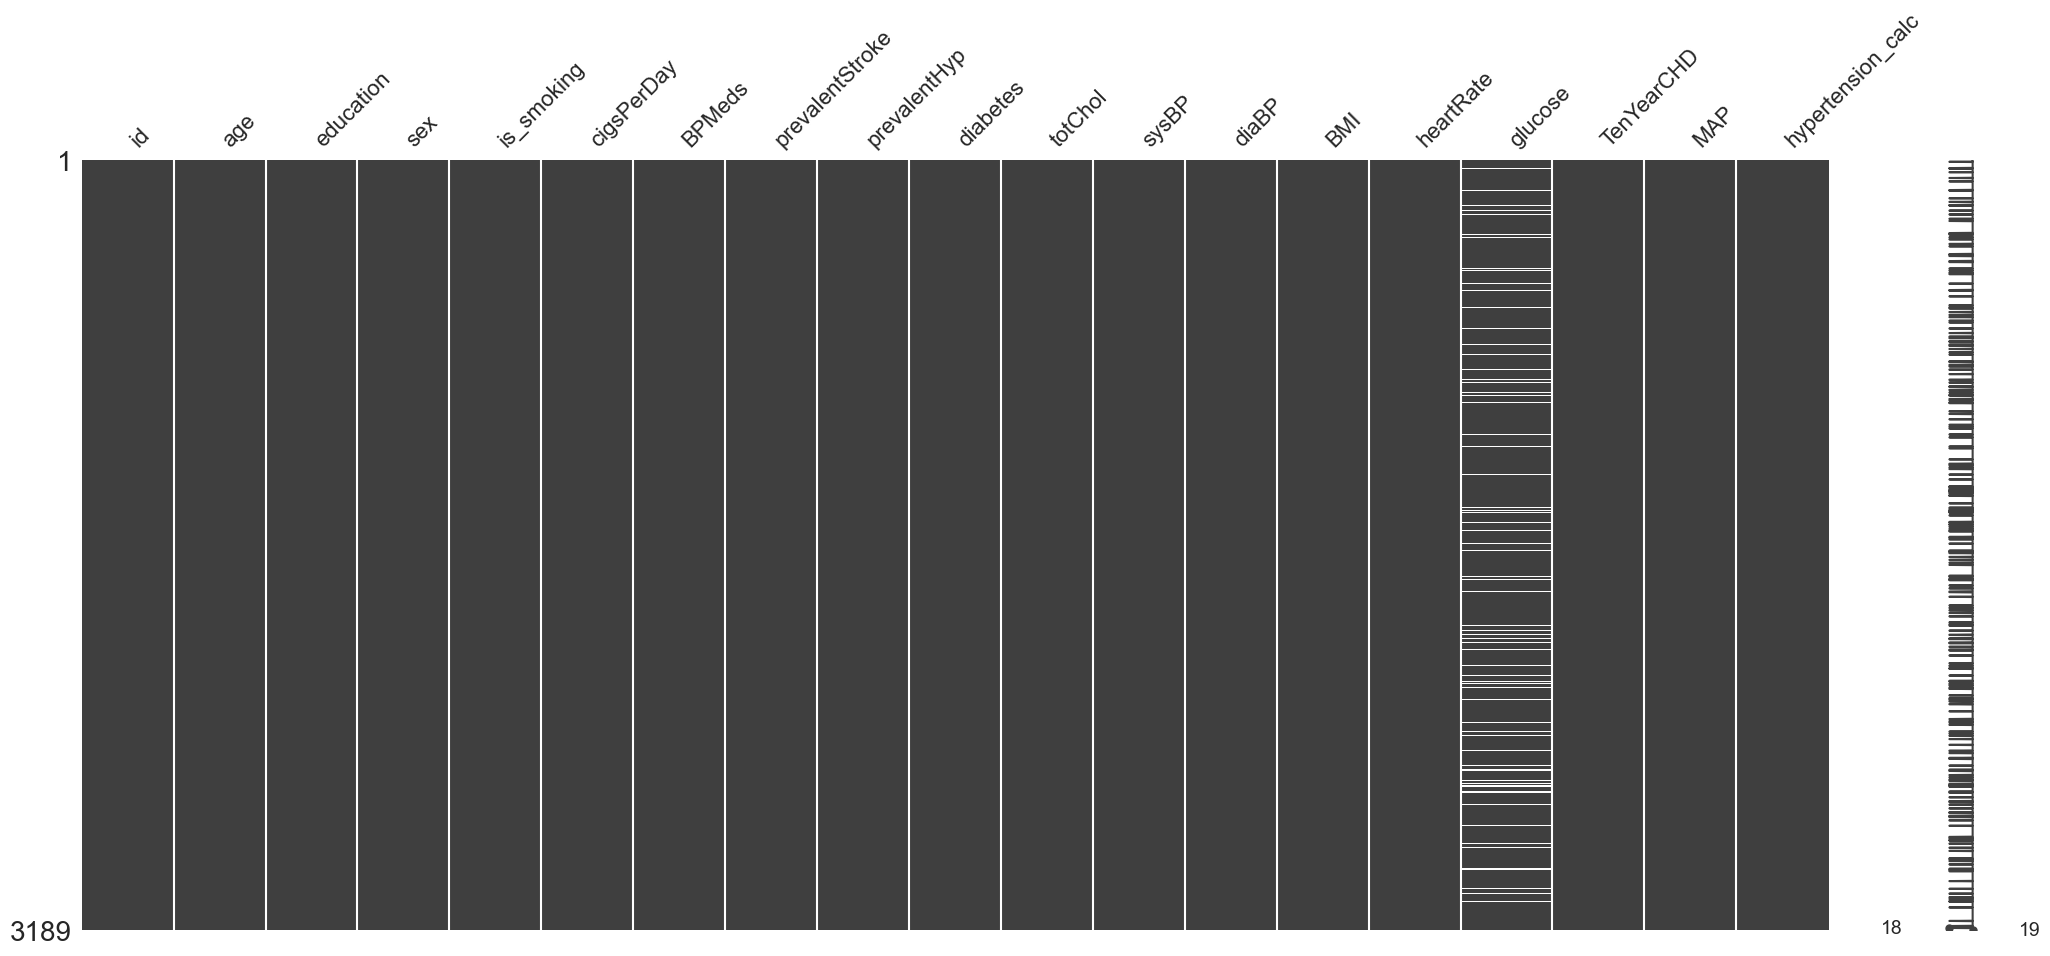

In [32]:
not_glucose_cols = ['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'TenYearCHD', 'MAP', 'hypertension_calc']

df_clean = df.dropna(subset=not_glucose_cols)
msno.matrix(df_clean);

Let's compare the target value from original df to the df_clean

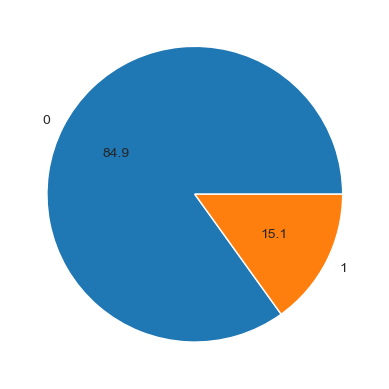

In [33]:
# Plotting 10-year risk
plt.pie(df['TenYearCHD'].value_counts(), labels=[0,1], autopct='%1.1f');

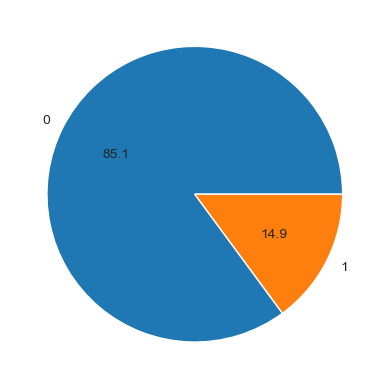

In [34]:
# Plotting 10-year risk
plt.pie(df_clean['TenYearCHD'].value_counts(), labels=[0,1], autopct='%1.1f');

Dropping these missing values had almost no effect on Ten Year Risk distribution.

In [35]:
# Functions to compare mean or median values of datasets based on kind of values
def compare_mean_median(df1, df2, column):
    
    # Calculate means and medians
    mean1 = df1[column].mean()
    mean2 = df2[column].mean()
    median1 = df1[column].median()
    median2 = df2[column].median()

    # Print results
    print(f'{column}:\n'
      f'Mean difference = {mean1 - mean2}\n'
      f'Median difference = {median1 - median2}\n')

In [36]:
continuous_cols.append('MAP')
for col in continuous_cols:
    compare_mean_median(df, df_clean, col)

age:
Mean difference = 0.11822553745313513
Median difference = 0.0

cigsPerDay:
Mean difference = -0.028672455568392152
Median difference = 0.0

totChol:
Mean difference = 0.10564180195797235
Median difference = 0.0

sysBP:
Mean difference = 0.16483625959813253
Median difference = 0.5

diaBP:
Mean difference = 0.041865566646407615
Median difference = 0.0

BMI:
Mean difference = 0.020395624621954767
Median difference = 0.00999999999999801

heartRate:
Mean difference = -0.056900560267251876
Median difference = 0.0

glucose:
Mean difference = 0.152115940244812
Median difference = 0.0

MAP:
Mean difference = 0.08287117497368968
Median difference = 0.0


In [37]:
# Function to compare categorical binomial features
def compare_cat(df1, df2, col):
    percentage1 = df1[col].value_counts().iloc[0] / df1[col].value_counts().sum()
    percentage2 = df2[col].value_counts().iloc[0] / df2[col].value_counts().sum()
    print(f'{col}: Difference = {(percentage1 - percentage2).round(3)}%')
    
compare_cat(df, df_clean, 'TenYearCHD')

TenYearCHD: Difference = -0.002%


In [38]:
# Calling function over all categorical columns
some_categorical_cols = ['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']
for col in some_categorical_cols:
    compare_cat(df, df_clean, col)

education: Difference = 0.002%
sex: Difference = 0.004%
is_smoking: Difference = -0.003%
BPMeds: Difference = -0.0%
prevalentStroke: Difference = -0.001%
prevalentHyp: Difference = -0.002%
diabetes: Difference = -0.0%


There is almost no difference in distribution of features between df and df_clean.
Side note: there are 4 categories in 'education' column, but considering it has not much of an impact on the risk, we can just check the first one.

# Dealing with the outliers

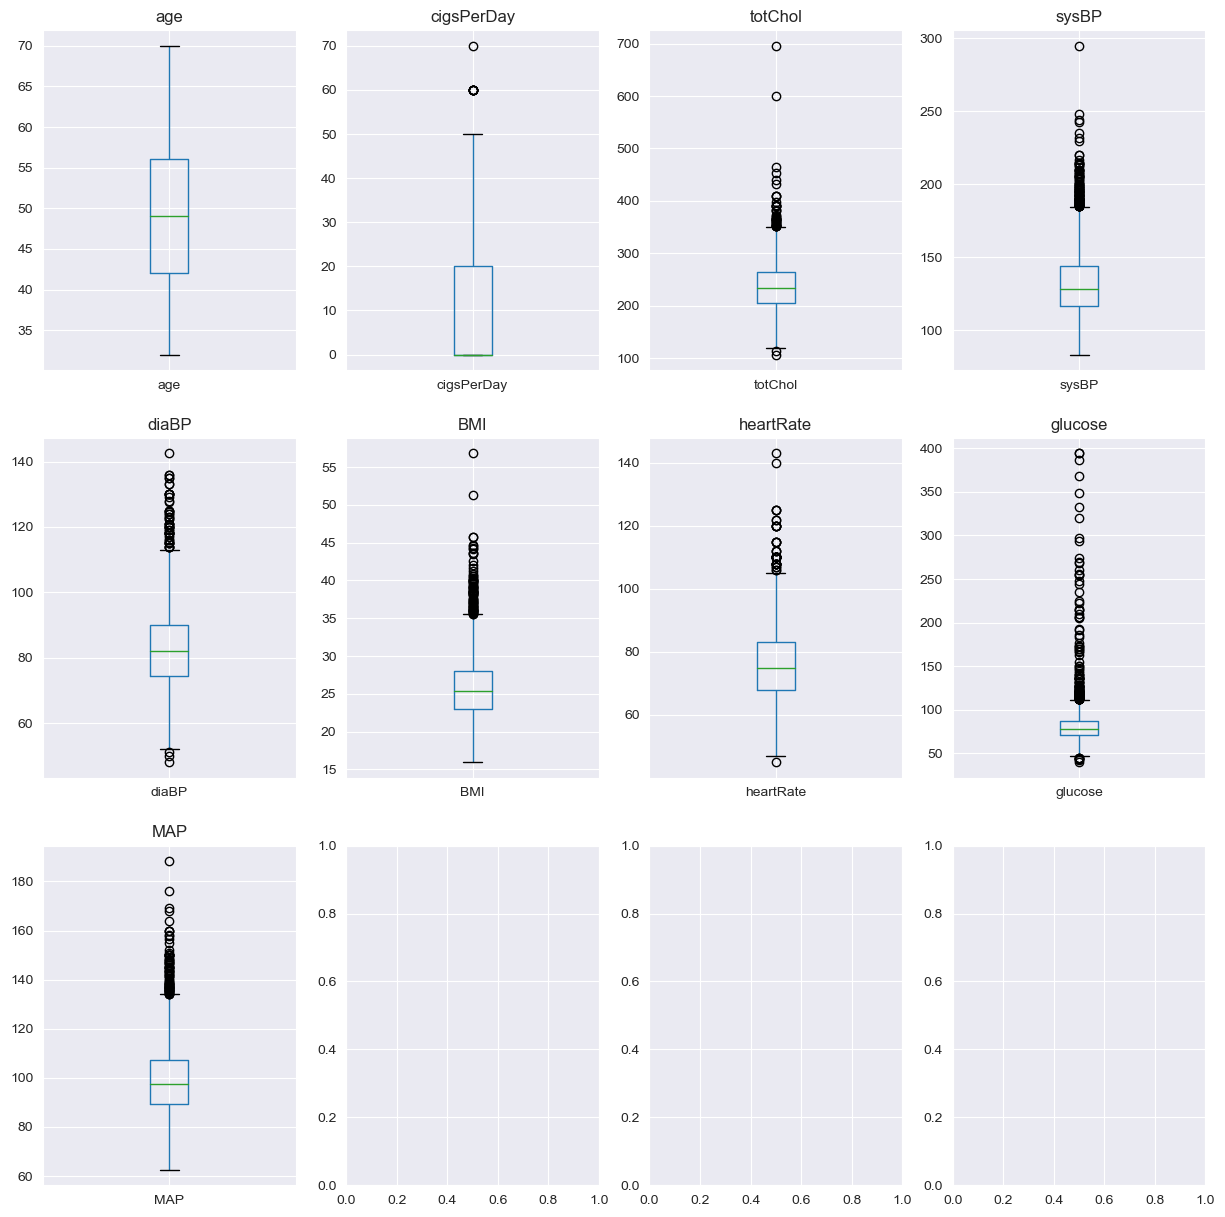

In [39]:
# Call a function to draw box plots
plot_box_grid(df, continuous_cols)

### Winsorizing approach

In [40]:
# Features to be Winsorized
to_wins_list = ['cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

In [41]:
def winsorize_outliers(data, cols):
    # create df with the same index and column names as data
    df_result = data.copy()

    for col in cols:
        # Determine IQR
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1

        # Determine limits
        lower = Q1 - IQR * 1.5
        upper = Q3 + IQR * 1.5

        # Getting quantiles for lower and upper
        lower_lim = data.loc[data[col] < lower][col].shape[0] / data[col].shape[0]
        upper_lim = 1 - data.loc[data[col] < upper][col].shape[0] / data[col].shape[0]

        # Winsorize data in column
        df_result[col] = winsorize(data[col], (lower_lim, upper_lim))
    
    return df_result

   

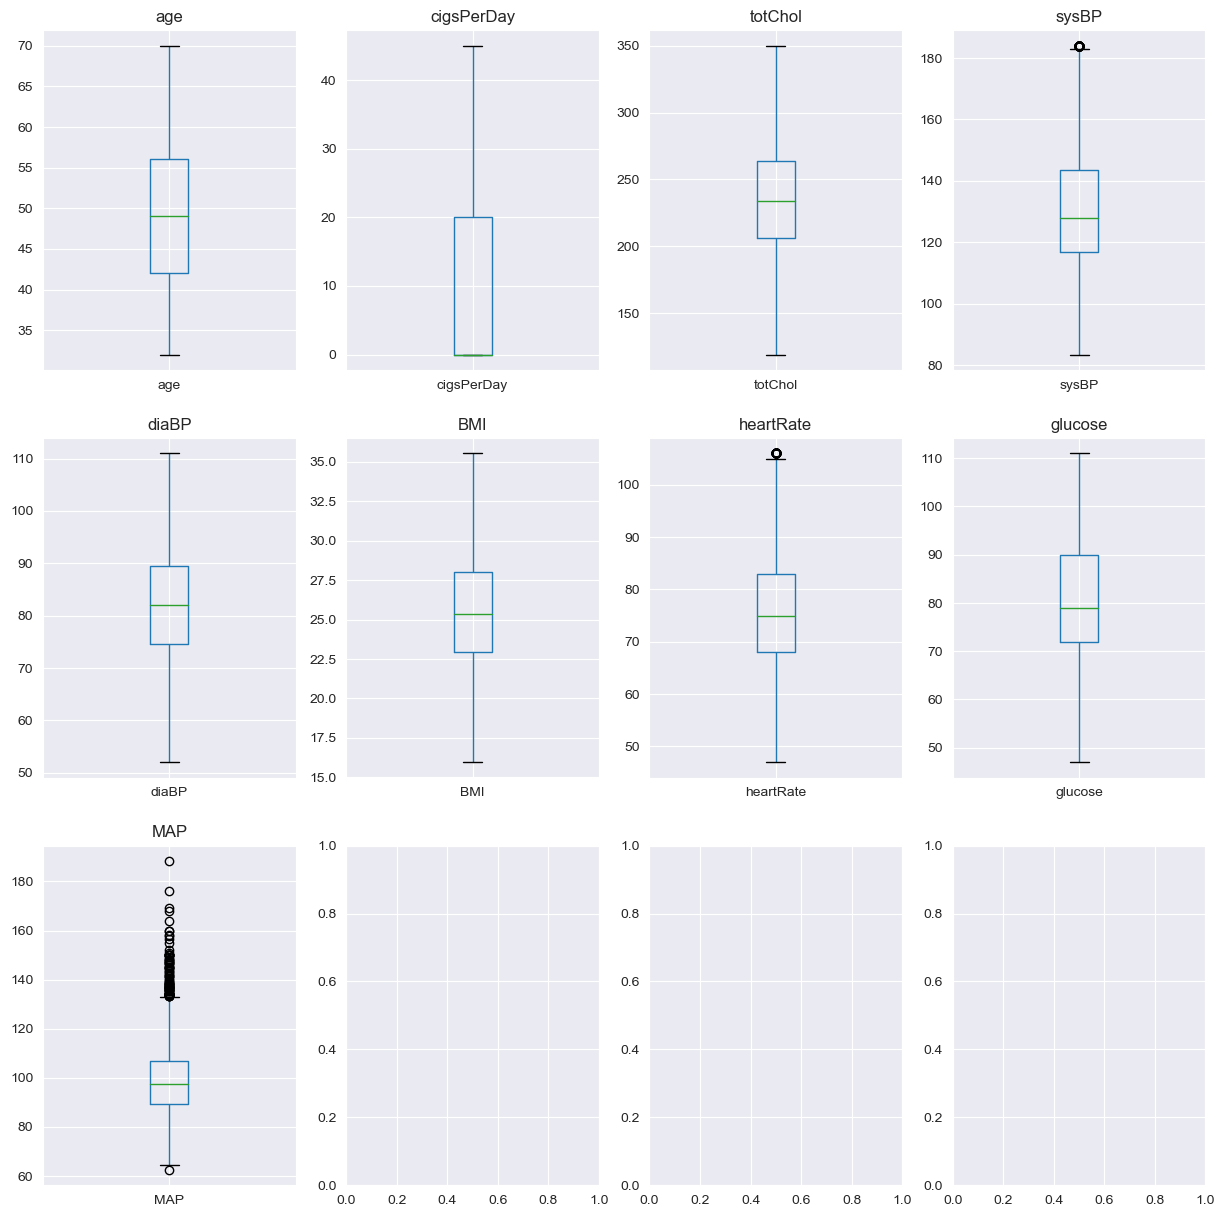

In [42]:
df_winsorized = winsorize_outliers(df_clean, to_wins_list)
plot_box_grid(df_winsorized, continuous_cols)

We will just recalculate MAP after Winsorizing, so that it represents BP values of the dataset.

In [43]:
# Recalculating MAP
calc_map(df_winsorized)
df_winsorized['MAP'].describe()

count    3189.000000
mean       99.083183
std        13.648092
min        63.170000
25%        89.330000
50%        97.670000
75%       106.830000
max       135.330000
Name: MAP, dtype: float64

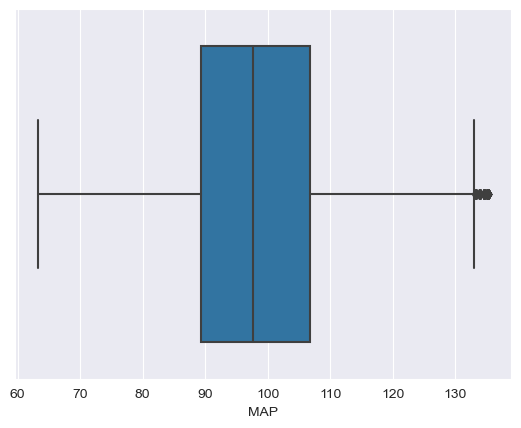

In [44]:
sns.boxplot(data=df_winsorized, x='MAP');

Looks better.

In [45]:
# Recalculating hypertension_calc for new data
classify_htn_map(df_winsorized)

Hypertension from original data: 2190
Hypertension calculated in new set: 2275


In [46]:
print(df.shape)
df.columns

(3390, 19)


Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD', 'MAP',
       'hypertension_calc'],
      dtype='object')

In [47]:
print(df_clean.shape)
df_clean.columns

(3189, 19)


Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD', 'MAP',
       'hypertension_calc'],
      dtype='object')

In [48]:
print(df_winsorized.shape)
df_winsorized.columns

(3189, 19)


Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD', 'MAP',
       'hypertension_calc'],
      dtype='object')

In [49]:
# Saving resulting dataframes to the 'processed' folder
processed_data_path = '../data/interim/'

# Data Clean
save_file(df_clean, 'data_clean.csv', processed_data_path)

# Data Winsorized
save_file(df_winsorized, 'data_winsorized.csv', processed_data_path)

A file already exists with this name.
Writing file.  "../data/interim/data_clean.csv"
A file already exists with this name.
Writing file.  "../data/interim/data_winsorized.csv"


# Summary of data wrangling
Data from the original dataset had the following features:
- Number of rows:                     3390
- Number of columns:                  17
- Value to be predicted by the model: TenYearCHD
- Number of duplicated values:        0
- Number of missing values:           510
- Top missing feature:                glucose (304 missing)
- `sex` and `is_smoking` columns are not numerical data type, might need to convert them later.

Actions:
Major missing feature `glucose` will be imputed later with different methods and performance of the model will be evaluated.
Other missing values were dropped as they are missing at random and there were less than 10% of such rows.
`sex` and `is_smoking` were converted to binary integer values

As a result of this cleaning the `df_clean` was generated.

Addressing outliers by winsorizing their values resulted in `df_winsorized` dataframe.

Resulting tables `df_clean` and `df_winsorized` were saved in `../data/interim` folder as `data_clean.csv` and `data_winsorized.csv`

